In [378]:
from skimage import exposure, io, morphology
import numpy as np
import matplotlib.pyplot as plt
import os
from script_tp2 import *
from PIL import Image, ImageEnhance
from skimage.filters import gaussian, apply_hysteresis_threshold, median
from skimage.morphology import remove_small_objects, opening, disk, square, black_tophat, erosion, reconstruction, area_opening, white_tophat

In [379]:
gt_images = ["GT_01.png", "GT_02.png", "GT_03.png", "GT_08.png", "GT_21.png", "GT_26.png", "GT_28.png", "GT_32.png", "GT_37.png", "GT_48.png"]
star_images = ["star01_OSC.jpg", "star02_OSC.jpg", "star03_OSN.jpg", "star08_OSN.jpg", "star21_OSC.jpg", "star26_ODC.jpg", "star28_ODN.jpg", "star32_ODC.jpg", "star37_ODN.jpg", "star48_OSN.jpg"]

# Image Selection
img_idx = 0
gt_path = os.path.join("images_IOSTAR", gt_images[img_idx])
star_path = os.path.join("images_IOSTAR", star_images[img_idx])

# Load Images
img_GT = np.asarray(Image.open(gt_path)).astype(np.uint8)
original_image = Image.open(star_path)

# Preprocessing

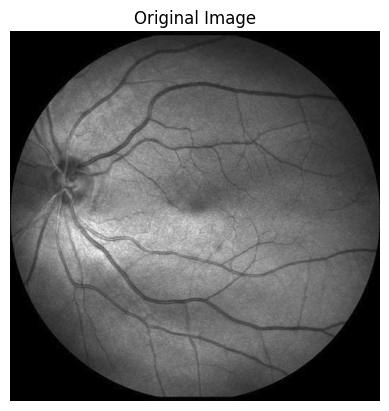

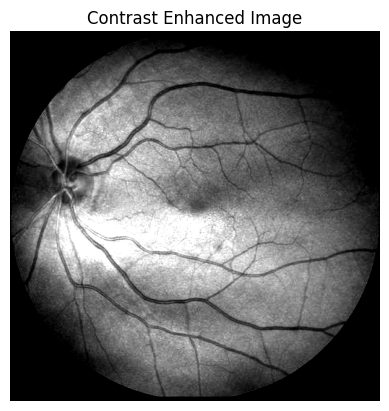

In [380]:
# Enhance contrast
enhancer = ImageEnhance.Contrast(original_image)
enhanced_image = enhancer.enhance(2.5)

# Display original & enhanced image
plt.figure()
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(enhanced_image, cmap='gray')
plt.title('Contrast Enhanced Image')
plt.axis('off')
plt.show()

# Custom Morphological methods

In [381]:
def max_opening_by_structures(img, structures):
    # Loop on all structs
    opened_imgs = [opening(img, struct) for struct in structures]
    
    return np.maximum.reduce(opened_imgs)

In [382]:
def sum_black_tophats_by_structures(img, structures):
    # Loop on all structs
    summed_tophats = np.zeros(img.shape, dtype=float)
    for struct in structures:
        summed_tophats += black_tophat(img, struct)

    return summed_tophats

In [383]:
def max_erosion_with_reconstruct(img, structures):
    # Loop on all structs
    eroded_imgs = [erosion(img, struct) for struct in structures]
    max_eroded = np.maximum.reduce(eroded_imgs)
    reconstructed = reconstruction(max_eroded, img, method='dilation')

    return reconstructed

In [384]:
# # white tophat transformation
# disk_size = disk(10)
# wth_image = white_tophat(opened_image, disk_size)
# 
# # Display original & transformed image
# fig, ax = plt.subplots(1, 2)
# ax[0].imshow(image, cmap='gray')
# ax[0].set_title('Original Image')
# ax[0].axis('off')
# 
# ax[1].imshow(wth_image, cmap='gray')
# ax[1].set_title('White Top-Hat Transformation')
# ax[1].axis('off')
# plt.show()


# Applying Morpho Methods

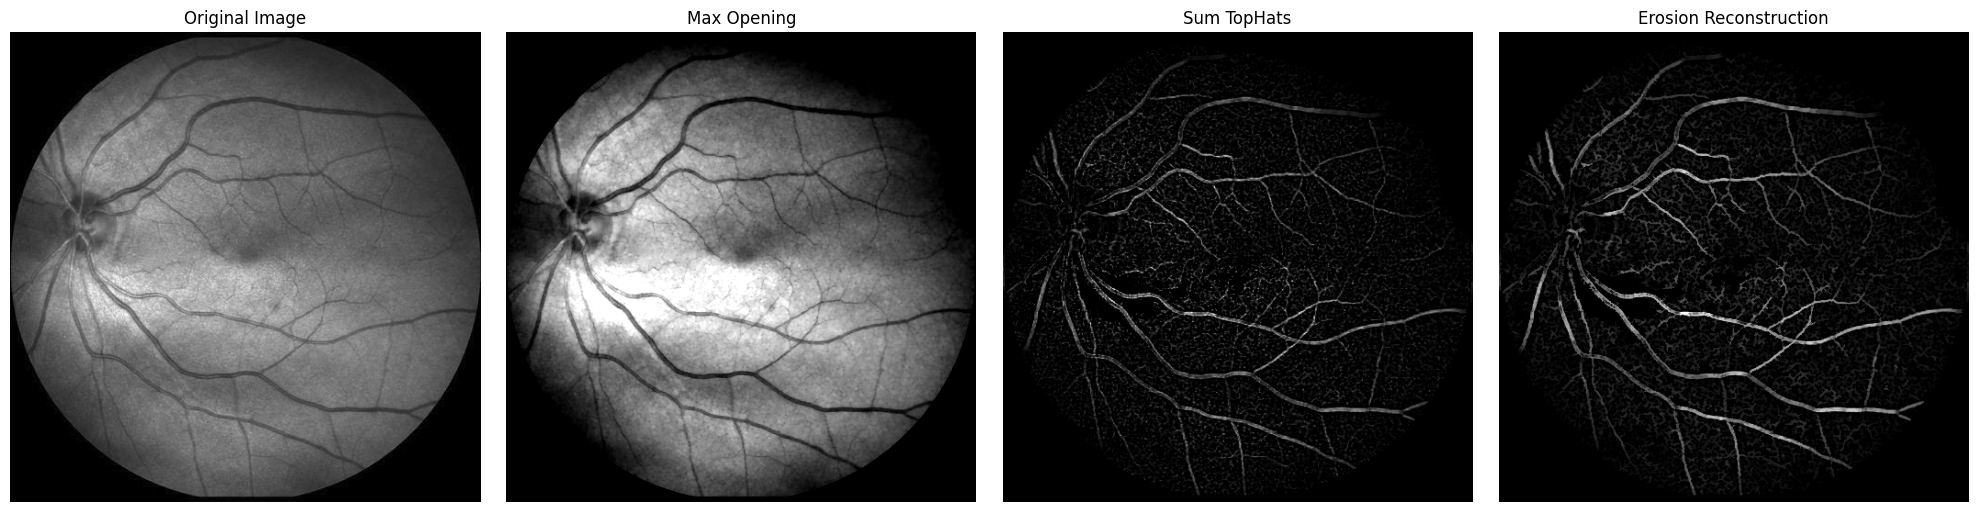

In [385]:
# Structures definitions
# TODO: try more disks, more shapes etc
# Better precision
structures = [disk(1), disk(2), disk(3)]
# Better recall
# structures = [disk(1), disk(3), disk(5)] 

# Opening
alg_opened_img = max_opening_by_structures(enhanced_image, structures)

# Black Top-hat
conj_tophats_img = sum_black_tophats_by_structures(alg_opened_img, structures)

# Erosion with Reconstruction
erosion_rec_img = max_erosion_with_reconstruct(conj_tophats_img, structures)

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(alg_opened_img, cmap='gray')
axes[1].set_title('Max Opening')

axes[2].imshow(conj_tophats_img, cmap='gray')
axes[2].set_title('Sum TopHats')

axes[3].imshow(erosion_rec_img, cmap='gray')
axes[3].set_title('Erosion Reconstruction')

for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

# Filtering

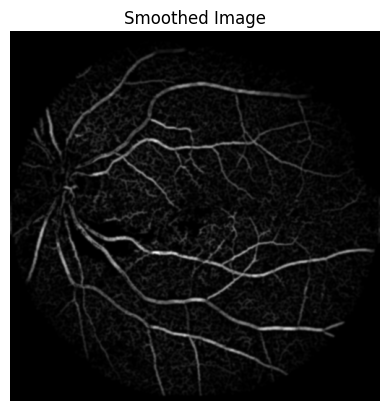

In [386]:
# Gaussian filtering
# TODO: try to adjust sigma
smoothed_image = gaussian(erosion_rec_img, sigma=1)

# Display smoothed image
plt.figure()
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')
plt.show()

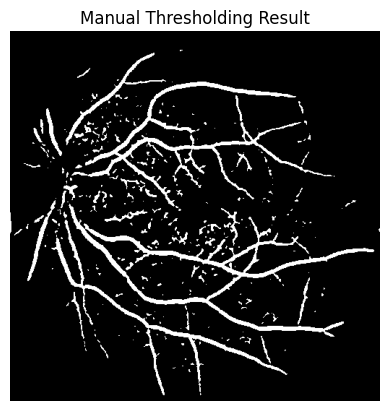

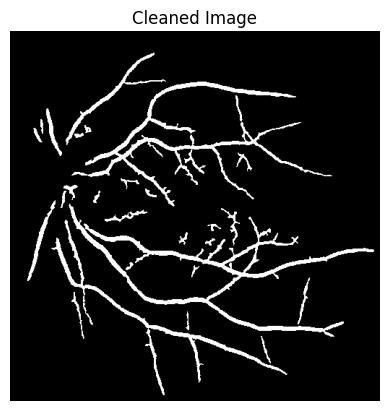

Cleaned Evaluation - Precision: 86.26%, Recall: 69.52%, F1 Score: 76.99%


In [387]:
# Manual thresholding 
# TODO: adjust value
manual_threshold_image = smoothed_image > 20

# Display manual thresolding image
plt.figure()
plt.imshow(manual_threshold_image, cmap='gray')
plt.title('Manual Thresholding Result')
plt.axis('off')
plt.show()

# Remove small objects
# TODO: adjust value
cleaned_image = remove_small_objects(manual_threshold_image, min_size=50)

# Display Cleaned image
plt.figure()
plt.imshow(cleaned_image, cmap='gray')
plt.title('Cleaned Image')
plt.axis('off')
plt.show()

# Evaluation
PRECIS, RECALL, F1SCORE, _, _ = evaluate(cleaned_image, img_GT)
print(f'Cleaned Evaluation - Precision: {PRECIS:.2%}, Recall: {RECALL:.2%}, F1 Score: {F1SCORE:.2%}')

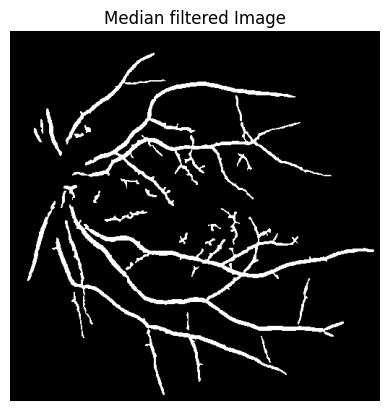

Median Evaluation - Precision: 87.65%, Recall: 69.14%, F1 Score: 77.31%


In [388]:
# Median filtering
# TODO: adjust disk size
median_image = median(cleaned_image, morphology.disk(1))

# Display median filtered image
plt.figure()
plt.imshow(median_image, cmap='gray')
plt.title('Median filtered Image')
plt.axis('off')
plt.show()

# Evaluation
PRECIS, RECALL, F1SCORE, _, _ = evaluate(median_image, img_GT)
print(f'Median Evaluation - Precision: {PRECIS:.2%}, Recall: {RECALL:.2%}, F1 Score: {F1SCORE:.2%}')

# Experiments

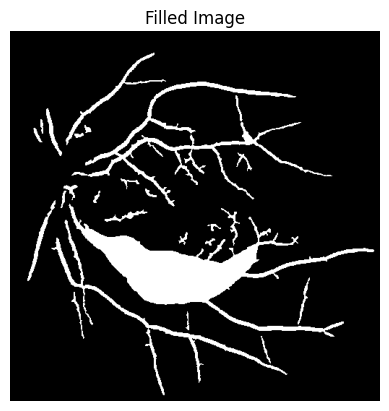

Filled Evaluation - Precision: 36.28%, Recall: 67.64%, F1 Score: 47.23%


In [389]:
from scipy.ndimage import binary_fill_holes
filled_image = binary_fill_holes(cleaned_image)

# Display Filled Image
plt.figure()
plt.imshow(filled_image, cmap='gray')
plt.title('Filled Image')
plt.axis('off')
plt.show()

# Evaluation
PRECIS, RECALL, F1SCORE, _, _ = evaluate(filled_image, img_GT)
print(f'Filled Evaluation - Precision: {PRECIS:.2%}, Recall: {RECALL:.2%}, F1 Score: {F1SCORE:.2%}')